<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_220520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chap 05. 회귀**

### **01. 회귀 소개**
  - 회귀 분석
    - 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
    - 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법

  - 머신러닝에서의 회귀 분석
    - 핵심은 주어진 피처와 결정값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.
  - 지도학습의 유형
    - 분류 : 예측값이 이산형
    - 회귀 : 예측값이 연속형

  - 선형 회귀
    - 실제값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식
    - 종류
      - 일반 선형 회귀
        - 예측값과 실제값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화, 규제를 적용하지 않은 모델
      - 릿지(Ridge)
        - 선형 회귀에 L2 규제를 추가한 모델
        - L2 규제는 상대적으로 큰 회귀 게수 값의 예측 영향도를 감소시키기 위해 계수값을 작게 만드는 규제 모델
      - 라쏘(Lasso)
        - 선형 회귀에 L1 규제를 추가한 모델
        - L1 규제는 예측 영향력이 적은 피처의 회귀 계수를 0으로 만들어 예측 시 피처가 선택되지 않게 하는 방식
      - 엘라스틱넷(ElasticNet)
        - L2, L1 규제를 적용한 방식
      - 로지스틱 회귀(Logistic Regression)
        - 분류에 사용되는 선형 모델
        - 이진 분류뿐만 아니라 텍스트 분류와 같은 영역에서 매우 뛰어난 예측 성능을 보임

---

### **02. 단순 선형 회귀를 통한 회귀 이해**
  - 단순 선형 회귀
    - 독립변수도 하나, 종속변수도 하나인 선형 회귀
  - 잔차(Residual)
    - 실제값과 회귀 모델의 차이에 따른 오류
    - 최적의 회귀 모델은 잔차 합이 최소가 되는 모델을 만든다는 의미
  - 오류 합 계산
    - 절댓값을 취해서 더하는 방식(Mean Absolute Error)
    - 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual of Sum of Square)
  
  $RSS(w_{0}, w_{1}) =$ $1\over N$ $∑_{i=1}^N (y_{i} - (w_{0} + w_{1}*x_{i}))^2$  
    - 일반적으로 RSS 방식 이용
      - RSS를 최소로 하는 w0, w1, 즉 회귀 계수를 학습을 통해서 찾는 것이 핵심
      - RSS는 w 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요
      - RSS는 비용이며, w 변수로 구성되는 RSS를 비용 함수라고 한다.
      - 비용 함수가 반환하는 값을 지속해서 감소시키고, 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이 목적

  
  

---

### **03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**
  - 경사 하강법(Gradient Descent)
    - 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
    - 즉, 오류를 감소시키는 방향으로 W 값을 계속 업데이트하고, 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환한다.
    - "어떻게 하면 오류가 작아지는 방향으로 W값을 보정할 수 있을까?"하는 것이 핵심

  - 경사 하강법의 일반적인 프로세스

$Step 1: w_{0}, w_{1}$를 임의의 값으로 설정하고, 첫 비용 함수의 값을 계산한다.

$Step 2: w_{1}을 w1+η$ $2\over N$ $∑_{i=1}^N x_{i} * (실제값_{i} - 예측값_{i}), w_{0}을 w_{0}+η$ $2\over N$ $∑_{i=1}^N (실제값_{i} - 예측값_{i})$으로 업데이트한 후, 다시 비용 함수의 값을 계산한다.

$Step 3:$ 비용 함수의 값이 감소했으면 다시 Step 2를 반복한다. 더 이상 비용 함수의 값이 감소하지 않으면, 그때의 $w_{0}, w_{1}$을 구하고 반복을 중지한다.


> 정리한 수식과 절차를 이용해 경사 하강법을 파이썬 세트로 구현해보자. 
$y = 4X + 6$을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 $w_{1}, w_{0}$을 도출한다.

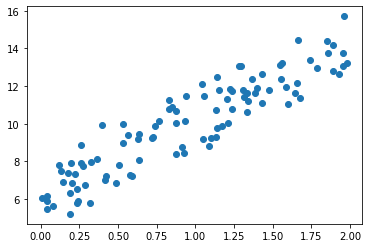

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)



*   데이터가 $y = 4X + 6$을 중심으로 무작위로 퍼져있다.



> 다음으로 비용 함수를 정의해보자. 비용 함수 get_cost()는 실제 y값과 예측된 y값을 인자로 받아서 $1\over N$ $∑_{i=1}^N(실제값_{i} - 예측값_{i})^2$을 계산해 반환한다.

In [63]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

> 이제 경사 하강법을 gradient_descent()라는 함수를 생성해 구현해보자. gradient_descent는 $w_{1}과 w_{0}$을 모두 0으로 초기화한 뒤, iters 개수만큼 반복하면서 $w_{1}과 w_{0}$을 업데이트한다. 즉, 새로운 $w_{1} = 이전 w_{1} + η$ $2\over N$ $\sum_{i=1}^N x_{i} * 실제값_{i} - 예측값_{i})$을 반복적으로 적용하면서 $w_{1}과 w_{0}$을 업데이트하는 것이다.

> get_weight_update()함수에서, 입력 배열 X값에 대한 예측 배열 y_pred는 np.dot(X, w1.T) + w0으로 구한다. 100개의 데이터 X(1,2, ... , 100)이 있다면 예측값은 w0 + X(1)*w1 + ... + X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적과 동일하다. 또한, get_weight_update()는 w1_update로 $-η$ $2\over N$ $\sum_{i=1}^N x_{i} * (예측 오류_{i})$를, w0_update로 $-η$ $2\over N$ $\sum_{i=1}^N (예측 오류_{i})$값을 넘파이의 dot 행렬 연산으로 계산한 뒤 이를 반환한다.

In [64]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측값과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))
  
  # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
  w1_update = -(2/N) * learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N) * learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

> 다음은 get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 $w_{1}과 w_{0}$을 업데이트하는 함수인 gradient_descent_steps() 함수를 생성한다.

In [65]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters = 10000):
  # w0과 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()함수를 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

> 이제 gradient_descent_steps()를 호출해 w1과 w0을 구해보자. 그리고 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost()함수를 생성하고, 이를 이용해 경사 하강법의 예측 오류도 계산해보자.

In [66]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1: {0:.3f}, w0: {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022, w0: 6.162
Gradient Descent Total Cost: 0.9935


> 실제 선형식과 유사하게 w1 = 4.022, w0 = 6.162가 도출되었다. 앞에서 구한 y_pred에 기반해 회귀선을 그려보자.

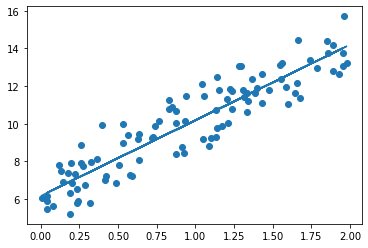

In [67]:
plt.scatter(X, y)
plt.plot(X, y_pred)

> 경사 하강법을 이용해 회귀선이 잘 만들어졌음을 알 수 있다. 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에, 수행 시간이 매우 오래 걸린다는 단점이 있다. 따라서 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용한다. 


*   확률적 경사 하강법
  - 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로, 경사 하강법에 비해 빠른 속도를 보장한다.



In [68]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터를 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

> 이렇게 만들어진 stochastic_gradient_descent_steps()를 이용해 w1, w0 및 예측 오류 비용을 계산해보자.

In [69]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1:', round(w1[0, 0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


> 경사 하강법과 큰 예측 성능상의 차이가 없음을 알 수 있다. 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로, 일반적으로 확률적 경사 하강법을 이용한다.

> 피처가 한 개인 경우 : $ŷ= w_{0} + w_{1} * X$를 이용해 회귀 계수 도출

> 피처가 여러 개인 경우 : $ŷ = w_{0} + w_{1}*X_{1} + ... + w_{100}*X_{100}$을 이용해 회귀 계수 도출

$\left[\begin{array}{rrr}
y_{1}\\
y_{2}\\
...\\
y_{n}
\end{array}\right]$ 
= $\left[\begin{array}{rrr} 
1&x_{11}&x_{12}&...&x_{1m}\\
1&x_{21}&x_{22}&...&x_{2m}\\
...&...&...&...&...\\
1&x_{n1}&x_{n2}&...&x_{nm}\\
\end{array}\right]$ * $\left[\begin{array}{rrr} 
w_{1}&w_{2}&...&w_{m}\\
\end{array}\right]^T + w_{0}$


$$ => ŷ = X_{mat} + W^T$$

---

### **05. 다항 회귀와 과적합/과소적합 이해**

#### **a. 다항 회귀 이해**
  - 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항(Polynomial) 회귀라고 한다. 즉, 다항 회귀는 $y = w_{0} + w_{1}*x_{1} + w_{2}*x_{2} + w_{3}*x_{1}*x_{2} + w_{4}*x_{1}^2 + w_{5}*x_{2}^2$과 같이 표현할 수 있다.
  - 한 가지 주의할 점은 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀이다. `회귀에서 선형/비선형` 회귀를 나누는 기준은 `회귀 계수가 선형/비선형인지에 따른 것`이지 독립변수의 선형/비선형 여부와는 무관하기 때문이다.

> 사이킷런에서는 다항 회귀를 위한 클래스를 명시적으로 제공하지는 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에, 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. PolynomialFeatures 클래스는 degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다. 다음 예제는 PolynomialFeatures를 이용해 단항값 $[x_{1}, x_{2}]$를 2차 다항값으로 $[1, x_{1}, x_{2}, x_{1}^2, x_{1}x_{2}, x_{2}^2]$로 변환하는 예제이다.

In [70]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


> 이번에는 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도한다. 이를 위해 3차 다항 회귀의 결정 함수식은 $y = 1 + 2x_{1} + 3x_{1}^2 + 4x_{2}^3$으로 설정하고, 이를 위한 함수 polynomial_func()를 만든다. 해당 함수는 3차 다항 계수 피처 값이 입력되면 결정값을 반환한다.

In [71]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [72]:
X[:, 0]

array([0, 2])

> 이제 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현된다. PolynomialFeatures(degree = 3)은 단항 계수 피처 $[x_{1}, x_{2}]$를 3차 다항 계수 $[1, x_{1}, x_{2}, x_{1}^2, x_{1}x_{2}, x_{2}^2, x_{1}^3, x_{1}^2x_{2}, x_{1}x_{2}^2, x_{1}^3]$과 같이 10개의 다항 계수로 변환된다.

In [73]:
from sklearn.linear_model import LinearRegression

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


> 10개의 회귀 계수 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]가 도출됐으며, 원래 다항식 $1 + 2x_{1} + 3x_{1}^2 + 4x_{2}^3$의 계수 값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와는 차이가 있지만 다항 회귀로 근사하고 있음을 알 수 있다. 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 앞의 예제보다 더 간단히 코드를 작성하는 방법이다.

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### **b. 다항 회귀를 이용한 과소적합 및 과적합 이해**
  - 다항 회귀는 복잡한 다항 관계를 모델링할 수 있다는 장점이 있으나, 다항 회귀의 차수가 높아질수록 과적합의 문제가 크게 발생한다.

> 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제이다.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

> 이제 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과르 비교해보자. 다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE값을 구해 차수별 예측 성능을 평가한다. 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려보자.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.32 입니다.


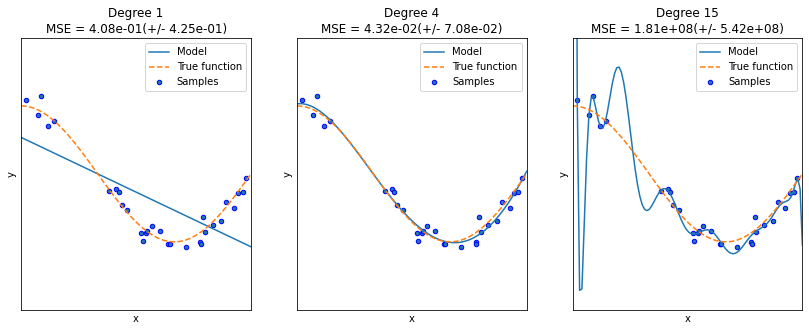

In [76]:
plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks = (), yticks = ())

  # 개별 degree별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)

  # 교차 검증으로 다항 회귀 평가
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = 'neg_mean_squared_error', cv = 10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나누어 예측 수행
  # 테스트 데이터 세트에 회귀 예측을 수행하고, 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label = 'True function')
  plt.scatter(X, y, edgecolor = 'b', s = 20, label = 'Samples')

  plt.xlabel('x') ; plt.ylabel('y') ; plt.xlim((0,1)) ; plt.ylim((-2, 2)) ; plt.legend(loc = 'best')
  plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

  - 실선 = 다항 회귀 예측 곡선
  - 점선 = 실제 데이터 세트 X,Y의 코사인 곡선
    - Degree 1
      - 단순한 직선으로서, 단순 선형 회귀와 동일
      - 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 단순
      - 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소 적합 모델이며, MSE 값은 약 0.407이다.

    - Degree 4
      - 실제 데이터 세트와 유사
      - 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델
      - MSE 값은 약 0.043으로 가장 뛰어난 예측 성능을 보인다.
    
    - Degree 15
      - 데이터 세트의 변동을 지나치게 반영한 결과, 예측 곡선이 학습 데이터만 정확히 예측하고 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 형성
      - 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되어 매우 높은 수준의 MSE 값을 얻었다.

> 결국 좋은 예측 모델은 Degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도, Degree 15와 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아닌, 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델이다.

#### **c. 편향-분산 트레이드오프(Bias-Variance Trade off)**
  - 편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈
    - Degree 1 모델의 경우 매우 단순화된 모델로서, 지나치게 한 방향성으로 치우친 경향이 있다. 이러한 모델을 고편향(High Bias)성을 가졌다고 한다.
    - Degree 15 모델의 경우 모든 학습 데이터의 특성을 반영하면서 매우 복잡한 모델이 되었고, 지나치게 높은 변동성을 가지게 되었다. 이런 모델을 고분산(High Variance)성을 가졌다고 표현한다.
    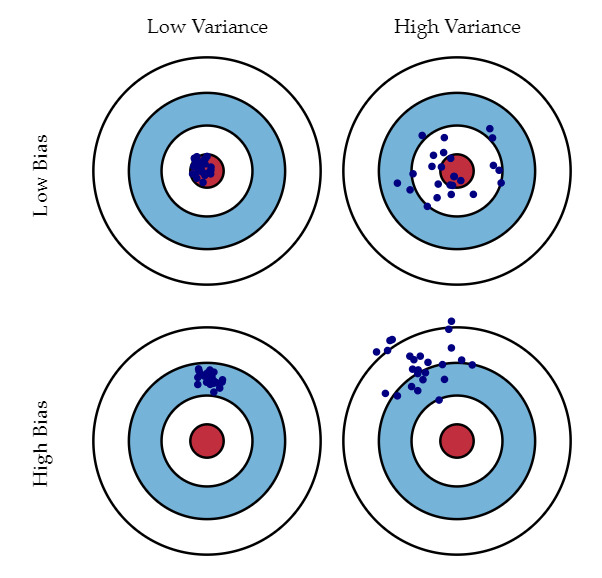
    - Low Bias/Low Variance : 예측 결과가 실제 결과에 매우 잘 근접하면서, 예측 변동이 크지 않고 특정 부분에 집중돼있다.
    - Low Bias/High Variance : 예측 결과가 실제 결과에 비교적 근접하나, 예측 결과가 실제 결과를 중심으로 꽤 넓게 분포한다.
    - High Bias/Low Variance : 정확한 결과에서 벗어나면서도 에측이 특정 부분에 집중돼있다.
    - High Bias/High Variance : 정확한 예측 결과를 벗어나고 넓은 부분에 분포한다.
  - 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 트레이드오프(trade-off) 관계
    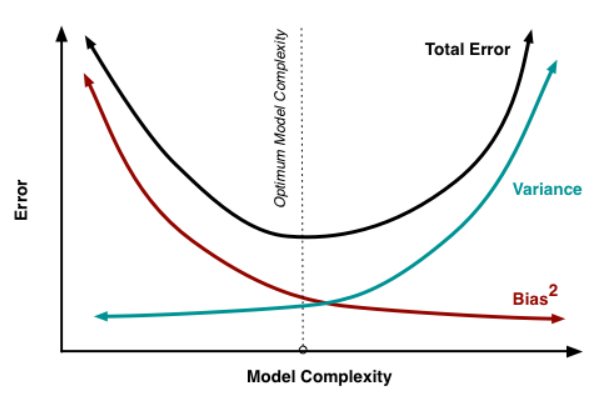
    - 편향이 너무 높으면 전체 오류가 높다. 
    - 편향을 점점 낮추면 동시에 분산이 높아지고, 전체 오류도 낮아진다.
    - 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면, 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하된다.
  - 따라서 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효과적인 머신러닝 예측 모델을 만드는 것이다.